In [3]:
import os
import sys
import pickle
import warnings
import time
import logging
import glob
import string

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from matplotlib import ticker
from matplotlib.legend import Legend
import matplotlib as mpl

from utils import *
from AnalyseDefects_dev import AnalyseDefects
from AnalyseDefectsAll import AnalyseDefectsAll

matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.style.use('sg_article')
plt.rcParams.update({"text.usetex": True,})

def produce_scaling(X, scaling_exp, Y0, x_bounds,):
    x = X[x_bounds[0]:x_bounds[1]]

    return x, Y0 * x**scaling_exp / x[0]**scaling_exp


In [4]:
LL = 2048
output_path = f'data\\na{LL}'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)

ad = AnalyseDefects(defect_list, output_path=output_path)

extract = False
analyze = False
merge = False

system_size_list = [256, 512,1024, 2048]
#system_size_list = [2048]
ada = AnalyseDefectsAll(system_size_list)

from AnalyseDefectsAll import AnalyseDefectsAll as AnDef
adaa = AnDef(system_size_list)

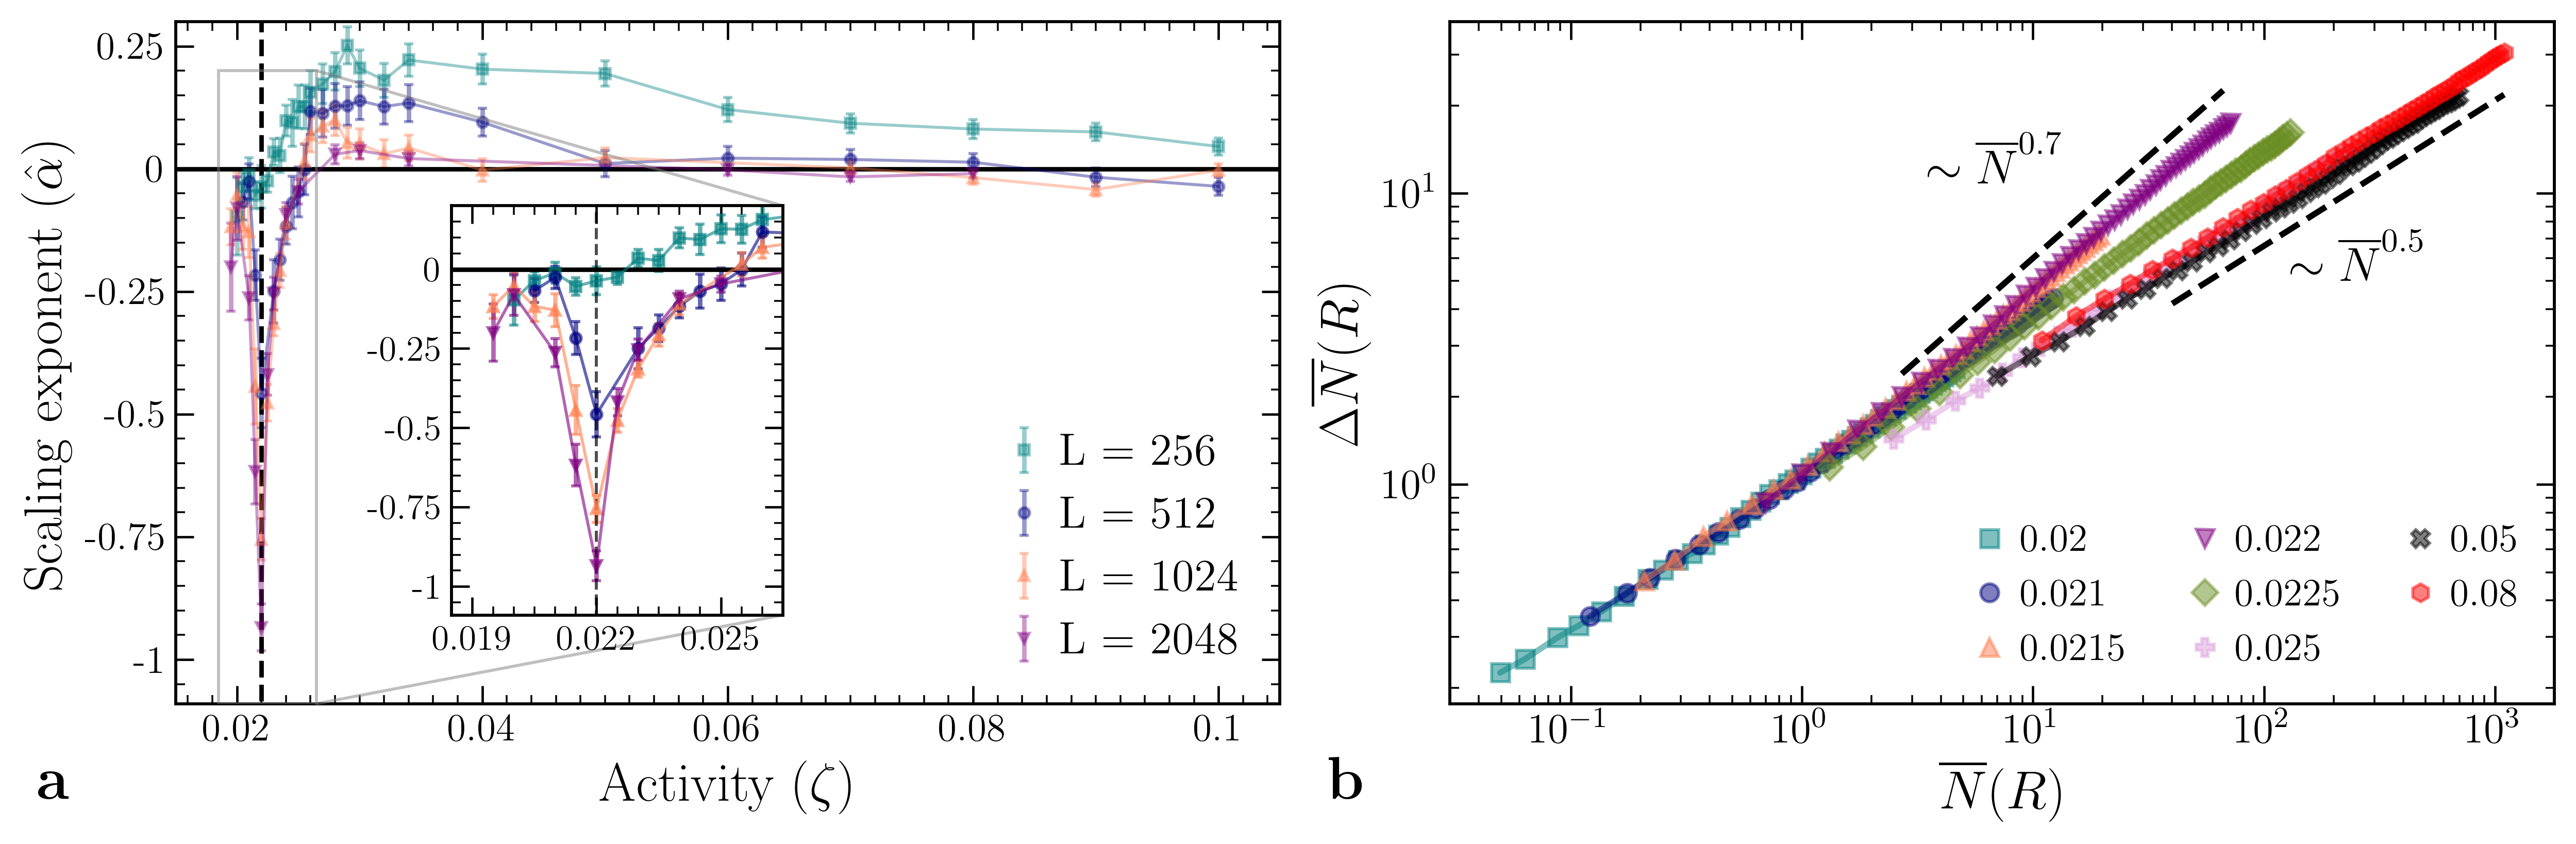

In [6]:
L = 2048
output_path = f'data\\na{LL}'
mode = 'all' # 'all' or 'short'
count_suffix = '_periodic_rm0.1'

defect_list = gen_analysis_dict(LL, mode)

ad = AnalyseDefects(defect_list, output_path=output_path, count_suffix = count_suffix)

extract = False
analyze = False
merge = False

var_counts_av, av_counts_av = ad.get_arrays_av(use_merged=True,)[1:3]
act_list_full = ada.act_list[ada.LX.index(LL)]
window_idx_bounds = [0,None]
act_list = act_list_full

fig, ax0 = plt.subplots(nrows = 1, ncols = 2, figsize=(12,12/3)) 
marker_shape = ['s-', 'o-', '^-', 'v-', 'D-', 'P-', 'X-', 'h-', 'd-', 'p-', 'H-', '8-', '1-', '2-']
ax0 = ax0.flatten()
ax = ax0[0]
axx = ax0[1]
act_max = 0.022
#normalize_sus = False

peak1 = 0.022
peak2 = 0.028

xmin = 0.25
ymin = 0.13
width = 0.3
inset_box = [xmin, ymin,1*width,2*width]

plot_fit_of_time_av = True
ax1, axin1 = ada.plot_alpha_mean_sfac(time_av=plot_fit_of_time_av, \
                                      act_idx_bounds=[1,None], alpha=.4, alpha_inset = .6, markersize=3.5,
                                          ax = ax, inset_box = inset_box)


ax1_xlims = [0.015, 0.105]
ax1_ylims = [-1.09, 0.3]
axin1_xlims = [0.0185, 0.0265] #[0.019, 0.035]
axin1_ylims = [ax1_ylims[0], .2] #[-.82, 0.3]


yticks = [-1.25, -1, -.75, -.5, -.25, 0, 0.25, 0.5]
axin1_yticks =  [-1.25, -1, -.75, -.5, -.25, 0, 0.25,]
xticks = np.round(np.linspace(ax1_xlims[0], ax1_xlims[1], 5), 2)
axin1_xticks = np.round(np.linspace(axin1_xlims[0]+0.001, axin1_xlims[1] - 0.001,3), 3)
axin1_xticks = [0.019, 0.022, 0.025]
ax1.set(xticks=xticks, yticks=yticks, xticklabels=xticks, yticklabels=yticks, xlim=ax1_xlims, ylim=ax1_ylims)
axin1.set(xticks=axin1_xticks, yticks=axin1_yticks, xticklabels=axin1_xticks, yticklabels=axin1_yticks, xlim=axin1_xlims, ylim=axin1_ylims)

ax1.vlines(peak1, -2, 1, color = 'k', lw = 1.5, linestyle = '--', alpha = 1)
axin1.vlines(peak1, -2, 1, color = 'k', lw = 1, linestyle = '--', alpha = .7)
#ax1.vlines(peak2, -1, 1, color = 'r', lw = 1.5, linestyle = '--', alpha = 1)
#axin1.vlines(peak2, -1, 1, color = 'r', lw = 1.5, linestyle = '--', alpha = 1)
ax1.hlines(0, 0, 1, color = 'k', lw = 1.5, linestyle = '-', alpha = 1)
axin1.hlines(0, 0, 1, color = 'k', lw = 1.5, linestyle = '-', alpha = 1)
ax1.indicate_inset_zoom(axin1,)
ax1.set_ylabel(r'Scaling exponent ($\hat{\alpha}$)', labelpad=3)

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(2e-3))
axin1.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
axin1.xaxis.set_minor_locator(ticker.MultipleLocator(5e-4))
ax1.legend()

#ax.legend()
ax1.set_xlabel(r'Activity ($\zeta$)', color='black')


marker_shape = ['s', 'o', '^', 'v', 'D', 'P', 'X', 'h', 'd', 'p', 'H', '8', '1', '2']

acts_to_plot = [0.02, 0.021, 0.0215, 0.022, 0.0225, 0.024, 0.028, 0.03, 0.034, 0.05, 0.06]
if ad.LX[0] == 2048:
    acts_to_plot = [0.02, 0.021, 0.0215, 0.022,0.0225, 0.025, 0.05, 0.08]
for i, act in enumerate(acts_to_plot):
    idx = act_list.index(act)
    axx.plot(av_counts_av[window_idx_bounds[0]:window_idx_bounds[1],idx,0], np.sqrt(var_counts_av[window_idx_bounds[0]:window_idx_bounds[1],idx,0]),\
             label=f'{act}', marker=marker_shape[i], alpha=.5)


idx22 = act_list.index(0.022)
idx40 = act_list.index(0.08)
scaling22 = (1+0.8/2)/2
window_idx_bounds = [5,-2]
window_idx_bounds40 = [5,None]


#ax.plot(av_counts_av[:,idx,0], 0.8*av_counts_av[:,idx,0]**0.69, label=r'$\sim x^{0.7}$', color='black', lw=1.5, linestyle='--')
#ax.plot(av_counts_av[:,idx,0], 0.8*av_counts_av[:,idx,0]**0.5,label=r'$\sim x^{0.5}$', color='black', lw=1.5, linestyle='-')


x22, y22 = produce_scaling(av_counts_av[:, idx22, 0], scaling22, 1.2* np.sqrt(var_counts_av[window_idx_bounds[0],idx22,0]), window_idx_bounds,)
x40, y40 = produce_scaling(av_counts_av[:, idx40, 0], .5, 0.7 * np.sqrt(var_counts_av[window_idx_bounds[0],idx40,0]), window_idx_bounds40,)
axx.plot(x22, y22, color='black', linestyle='--')
axx.plot(x40, y40,  color='black', linestyle='--')
axx.text(130,5, r'$\sim \overline{N}^{0.5}$', fontsize=16)
axx.text(3.5,10.8, r'$\sim \overline{N}^{0.7}$', fontsize=16)

axx.set_xlabel(r'$\overline{N}(R)$')
axx.set_ylabel(r'$\sqrt{\overline{N^2}(R) - \overline{N}(R)^2}$')
axx.set_ylabel(r'$\Delta \overline{N}(R)$')
#ax.set_ylim(.5,8)
#ax.set_xlim(1,100)
axx.legend(ncols=3,fontsize=13, loc = 'lower right')
axx.set_xscale('log')
axx.set_yscale('log')


#for n, AXX in enumerate(ax0):
#    AXX.text(-0.17 if n==0 else -.13, -.12, string.ascii_lowercase[n], transform=AXX.transAxes,
#            size=20, weight='bold')
    
for n, AXX in enumerate(ax0):
    AXX.text(-0.125 if n==0 else -.11, -.14, rf'$\textbf{{{string.ascii_lowercase[n]}}}$', transform=AXX.transAxes,
            size=20, weight='bold')
    AXX.tick_params(axis='both',which='major', labelsize=13 if n==0 else 14)
#ax[1].tick_params(axis='both',which='major', labelsize=13)
#set(groot, 'DefaultTextRenderer', 'painters'); % Use the Painters renderer

#import matplotlib as mpl
#mpl.use('pgf')
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",})  # Use pdflatex
   # "text.usetex": True,          # Enable LaTeX rendering

fig.tight_layout()
#fig.dpi=420
save_path = "C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Figures\\article\\alpha_gnf_v2.png"
fig.savefig(save_path, dpi=420,)
#plt.show()

In [ ]:
LL = 2048
output_path = f'data\\na{LL}'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)

ad = AnalyseDefects(defect_list, output_path=output_path)

extract = False
analyze = False
merge = False

var_counts_av, av_counts_av = ad.get_arrays_av(use_merged=True,)[1:3]
act_list_full = ada.act_list[ada.LX.index(LL)]
fig, ax = plt.subplots(figsize=(7,4))
window_idx_bounds = [0,25]

marker_shape = ['s', 'o', '^', 'v', 'D', 'P', 'X', 'h', 'd', 'p', 'H', '8', '1', '2']
act_list = act_list_full

acts_to_plot = [0.02, 0.021, 0.0215, 0.022, 0.03,0.05]#, 0.0225, 0.024, 0.03, 0.034, 0.05, 0.06]
if ad.LX[0] == 2048:
    acts_to_plot = [0.02, 0.021, 0.0215, 0.022, 0.024,0.03, 0.034, 0.05, 0.06]
for i, act in enumerate(acts_to_plot):
    idx = act_list.index(act)
    ax.plot(av_counts_av[window_idx_bounds[0]:window_idx_bounds[1],idx,0], np.sqrt(var_counts_av[window_idx_bounds[0]:window_idx_bounds[1],idx,0]),\
             label=f'{act}', marker=marker_shape[i], alpha=.5)

if 1:
    idx22 = act_list.index(0.022)
    idx40 = act_list.index(0.050)
    scaling22 = (1+0.5/2)/2
    window_idx_bounds = [10,25]

    x22, y22 = produce_scaling(av_counts_av[:, idx22, 0], scaling22, 1.2*np.sqrt(var_counts_av[window_idx_bounds[0],idx22,0]), window_idx_bounds,)
    x40, y40 = produce_scaling(av_counts_av[:, idx40, 0], .5, .8 * np.sqrt(var_counts_av[window_idx_bounds[0],idx40,0]), window_idx_bounds,)
    ax.plot(x22, y22, color='black', linestyle='--')
    ax.plot(x40, y40*0.82,  color='black', linestyle='--')
    ax.text(130,6, r'$\sim \overline{N}^{0.5}$', fontsize=14)
    ax.text(55,10.8, r'$\sim \overline{N}^{0.7}$', fontsize=14)
    #ax.plot(av_counts_av[:,idx,0], 0.8*av_counts_av[:,idx,0]**0.69, label=r'$\sim x^{0.7}$', color='black', lw=1.5, linestyle='--')
    #ax.plot(av_counts_av[:,idx,0], 0.8*av_counts_av[:,idx,0]**0.5,label=r'$\sim x^{0.5}$', color='black', lw=1.5, linestyle='-')



ax.set_xlabel(r'$\overline{N}$')
ax.set_ylabel(r'$\sqrt{\overline{N^2} - \overline{N}^2}$')
#ax.set_ylim(.5,8)
#ax.set_xlim(1,100)
ax.legend(ncols=3,fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')